# Training a Simple Traffic Sign Classifier 

__Objective__: Create a CNN (Convolutional Neural Network) model. Use this model to classify traffic signs.

__Workflow__:
1.  Load the `Traffic Sign` dataset and examine its structure.
    - Download `tsrd-train` from http://www.nlpr.ia.ac.cn/pal/trafficdata/detection.html.
    - Take a closer look at the data inspecting it's size, shape, and quantity.
    - View some random samples using either OpenCV or Matplotlib (or others) of the handwritten digits and observe the complexity of the images. Do you have any issues identify these written numbers?
2. Using `numpy` or other libraries prepare your dataset for training.
    - Ensure the format or shape of the data is appropriate for input into your model (one-hot-encoding is needed for the labels)
    - Ensure data types are correct and that data is normalized. 

__Deliverable__:

The deliverable is a Jupyter Notebook documenting your workflow as you take the `Traffic Sign` dataset, view samples, convert it into the proper shape/format as required by your deep learning library. You are required to train the model using the specifications provided. You should save your model as you'll need it for further analysis in the second milestone.

In [1]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Dropout, Flatten, Dense

from plot_keras_history import plot_history
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ModelCheckpoint
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix,ConfusionMatrixDisplay
from sklearn.metrics import plot_confusion_matrix

import pandas as pd
from glob import glob
from tqdm import tqdm
import cv2
from keras.preprocessing.image import  img_to_array
import os
import numpy as np
from tensorflow.keras.utils import to_categorical
import matplotlib.patches as patches

In [5]:
IMAGE_PATH_TRAIN = '../../data/tsrd-train/'
COL_NAMES = ['filename','f1','f2','x1','y1','x2','y2','label']
IMAGE_SIZE = (134,128)
EPOCHS = 30
BS = 100
MODEL_NAME = 'cnn-traffic-sign.h5'

In [6]:
df = pd.read_csv('../../data/TsignRecgTrain4170Annotation.txt',names=COL_NAMES,sep=';', index_col=False)

files = glob(IMAGE_PATH_TRAIN + '*.png')
data = []
labels = []

for fname in tqdm(range(len(files)),):
    fname = files[fname]
    image = cv2.imread(fname)
    image = cv2.resize(image, IMAGE_SIZE)
    image = img_to_array(image)
    data.append(image)
    
    label = df.query("filename=='" + os.path.split(fname)[1] + "'").label.values[0]
    labels.append(label)
    
data = np.array(data) / 255.0
labels = to_categorical(labels)

(trainX, testX, trainY, testY) = train_test_split(data, labels,
	test_size=0.20, stratify=labels, random_state=42)

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4170/4170 [00:24<00:00, 169.45it/s]


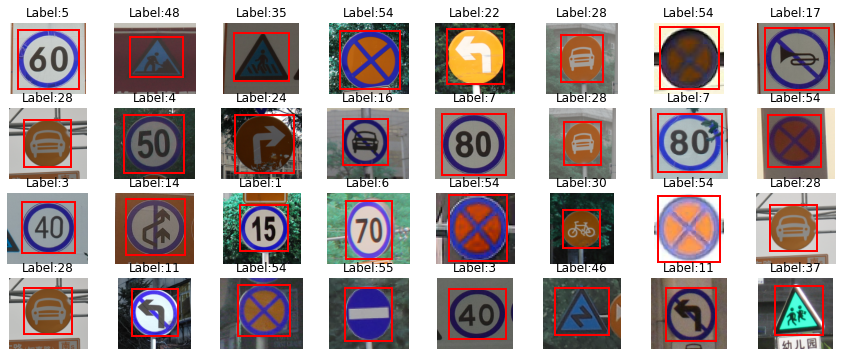

In [7]:
NUM_OF_ROWS = 4
NUM_OF_COLS = 8
fig, ax = plt.subplots(NUM_OF_ROWS,NUM_OF_COLS, figsize=(15,6))

for i in range(NUM_OF_ROWS):
    for j in range(NUM_OF_COLS):
        img_sample = df.sample(1)
        fname = img_sample.filename.values[0]
        image = cv2.imread(IMAGE_PATH_TRAIN + fname)
        image = img_to_array(image)/255.0
        ax[i,j].imshow(image)

        x = img_sample.x1.values[0]
        y = img_sample.y1.values[0]
        width = img_sample.x2.values[0] - img_sample.x1.values[0]
        height = img_sample.y2.values[0] - img_sample.y1.values[0]
        rect = patches.Rectangle((x, y), width, height, linewidth=2, edgecolor='r', facecolor='none')
        ax[i,j].add_patch(rect)
        ax[i,j].axis('off')
        ax[i,j].set_title('Label:' + str(img_sample.label.values[0]))
plt.show()

In [10]:
np.savez('../../data/traffic_sign.npz', data=data,labels=labels)